In [1]:
import pbjam as pb
import lightkurve as lk 
import importlib

Checkpoint exception raise


In [2]:
print(f'PBjam version {pb.__version__}')
print(f'Lightkurve version {lk.__version__}')

PBjam version 0.1.13
Lightkurve version 1.9.1


In [3]:
ID = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [4]:
lcs = lk.search_lightcurvefile(ID, mission='Kepler', quarter=6).download_all()

In [5]:
lc = lcs.PDCSAP_FLUX.stitch().flatten(window_length=1001).normalize('ppm').remove_outliers(5)

/Users/davies/Library/Python/3.7/lib/python/site-packages/lightkurve/lightcurve.py:675: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


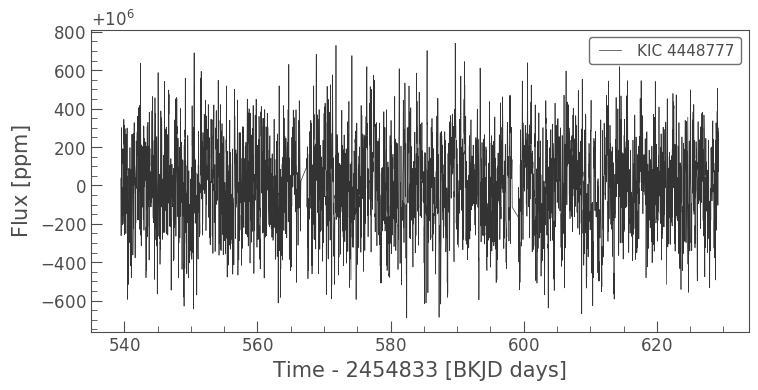

In [6]:
lc.plot()

In [7]:
pg = lc.to_periodogram(normalization='psd', maximum_frequency=288.0).flatten()

In [8]:
seismology = pg.to_seismology()
seismology.estimate_numax()
seismology.estimate_deltanu()

deltanu: 17.41 uHz (method: ACF2D)

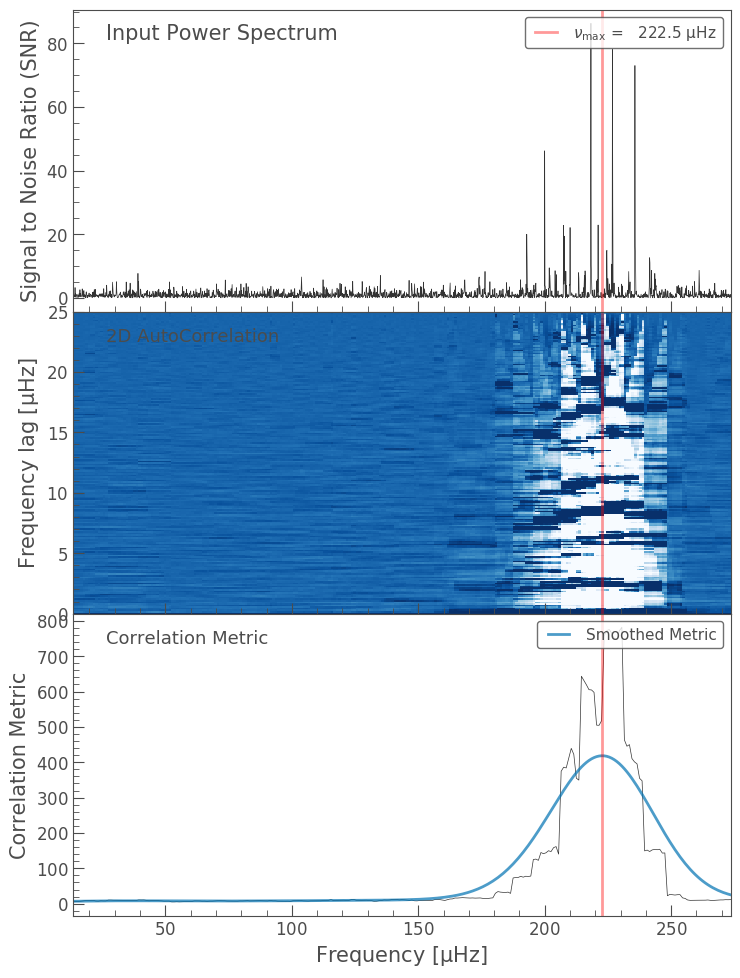

In [9]:
seismology.diagnose_numax();

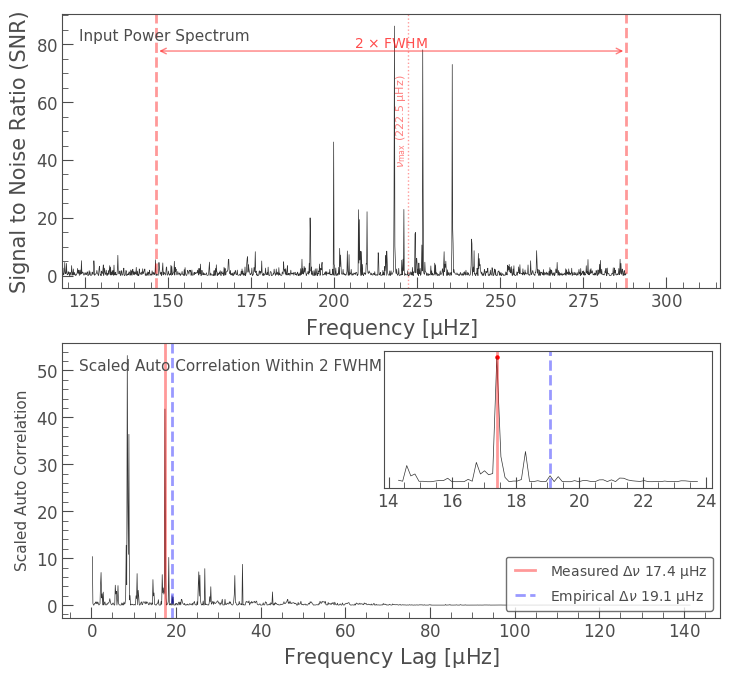

In [10]:
seismology.diagnose_deltanu();

In [11]:
numax = [seismology.numax.value, 5.0]
dnu = [16.97, 0.2]

In [12]:
star = pb.star(ID, pg, 
               numax, dnu, teff, bp_rp, 
               prior_method='MvN')

Starting prior estimation
Steps taken: 2000
Chains reached stationary state after 2000 iterations.


2020-07-01, 20:15:32 - matplotlib.legend: No handles with labels found to put in legend.
2020-07-01, 20:15:32 - matplotlib.legend: No handles with labels found to put in legend.


CPU times: user 9.7 s, sys: 349 ms, total: 10 s
Wall time: 8.18 s


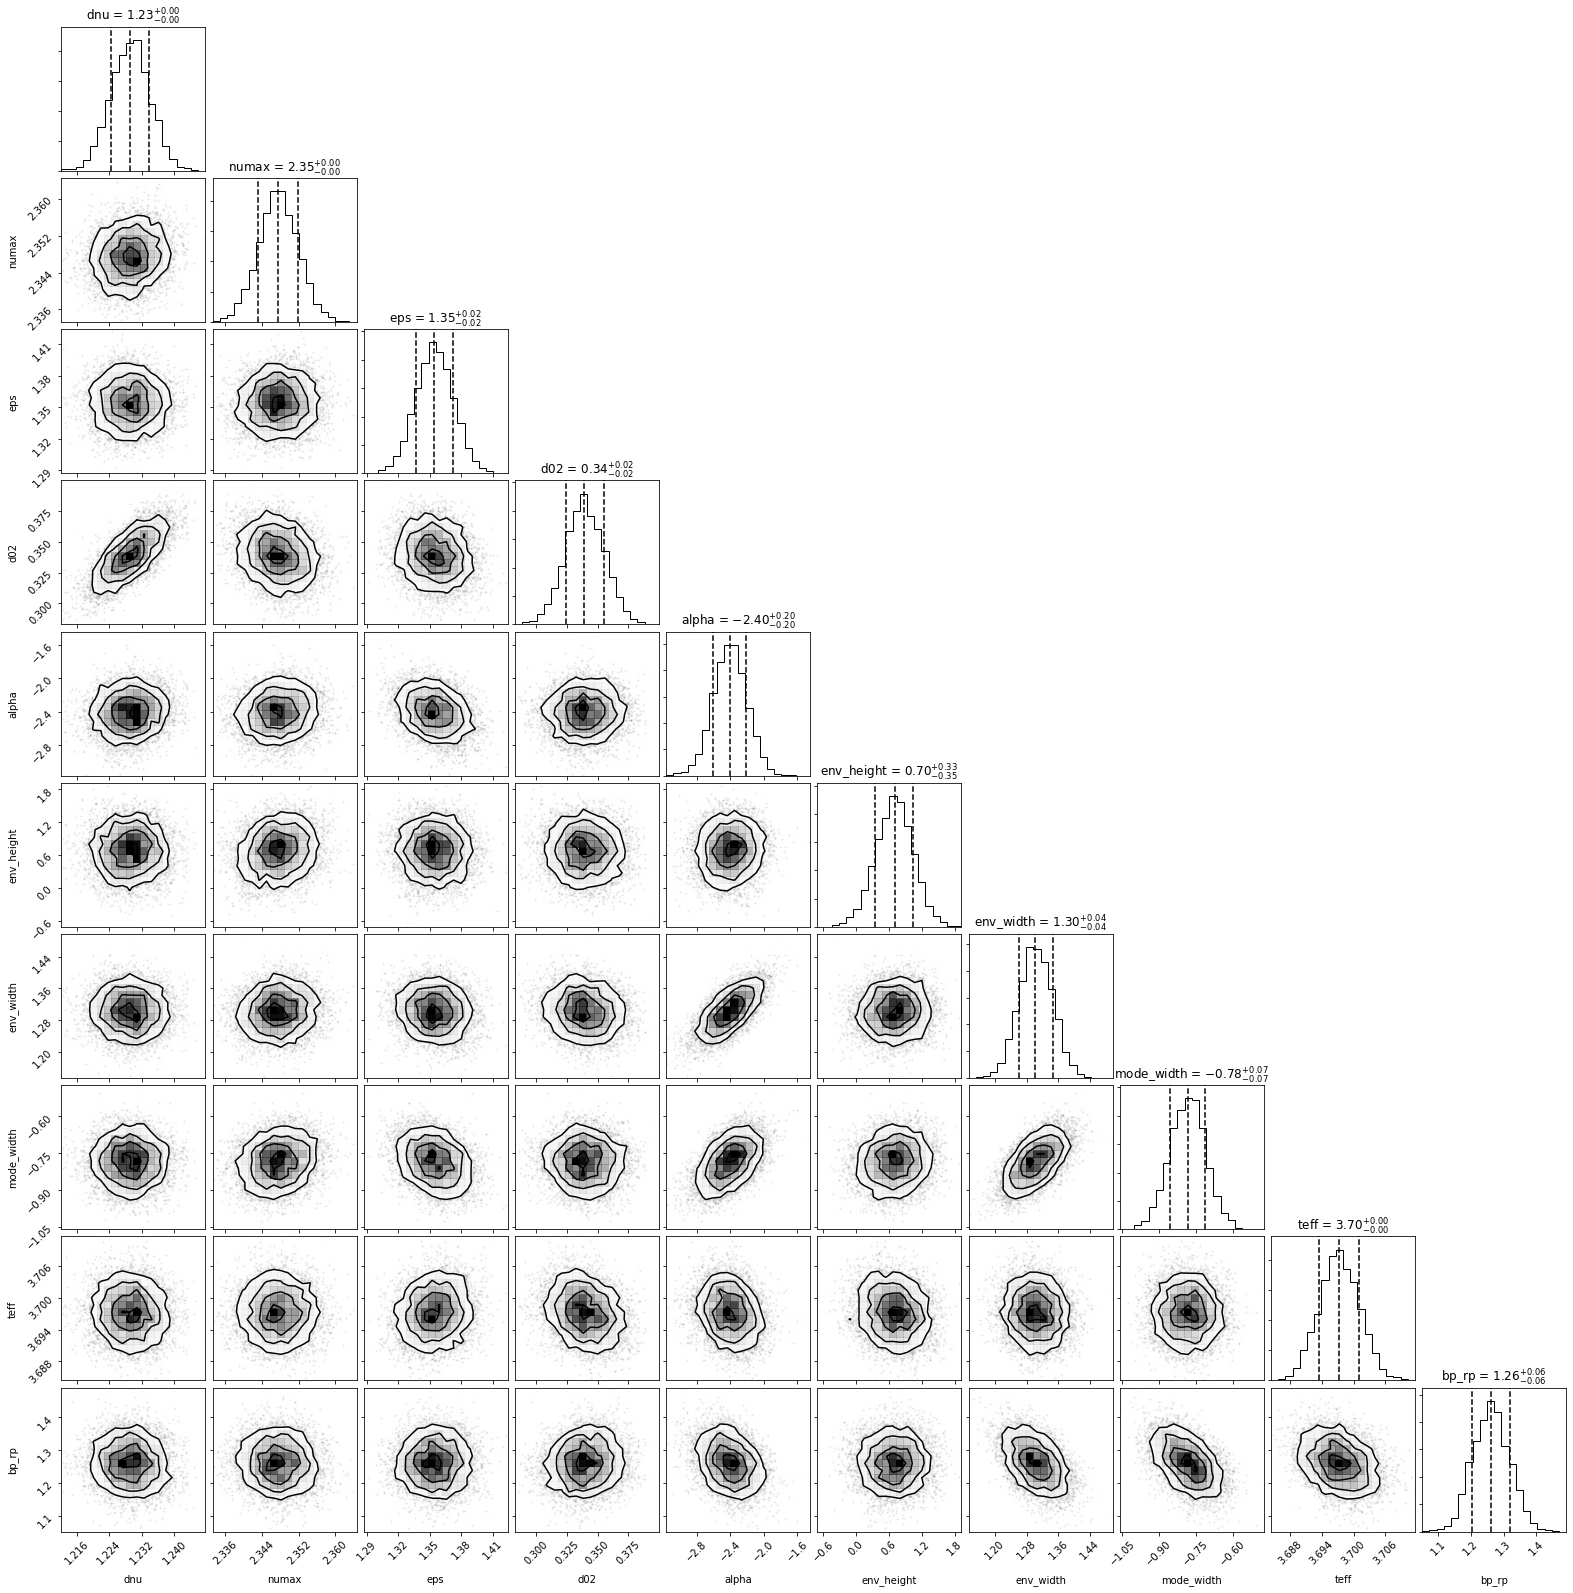

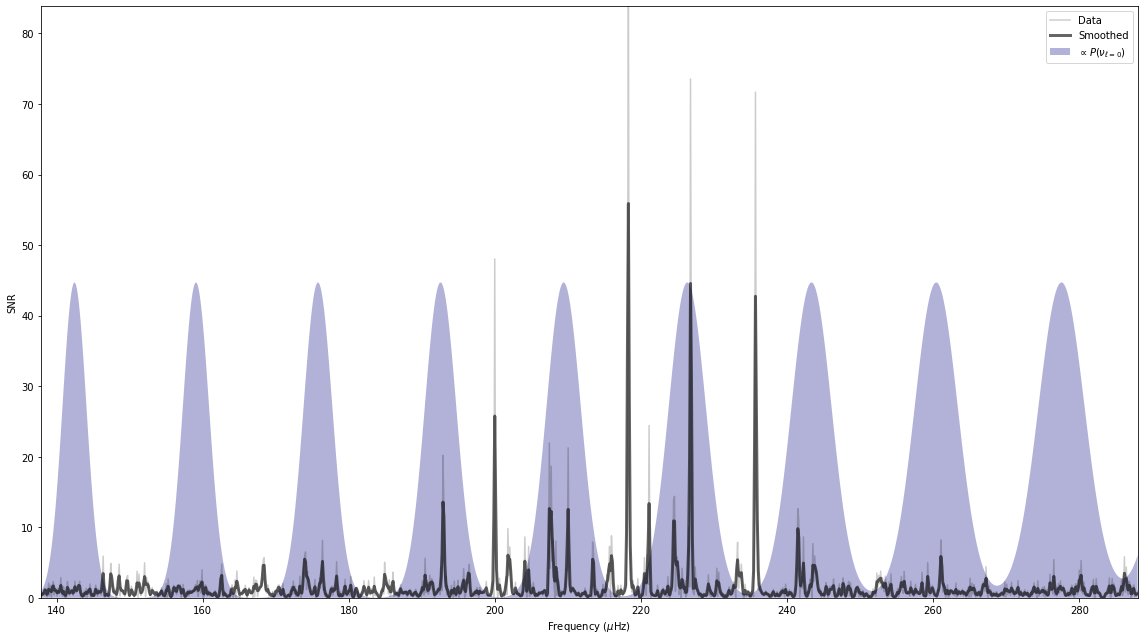

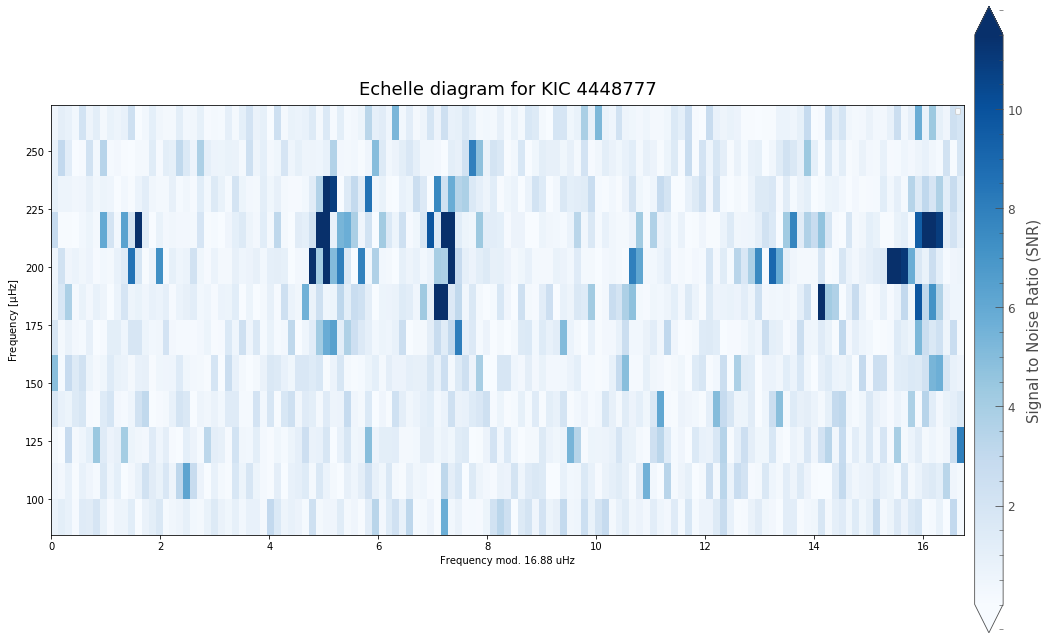

In [13]:
%%time
star.run_prior(make_plots=True)

Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
CPU times: user 51.8 s, sys: 599 ms, total: 52.4 s
Wall time: 51.1 s


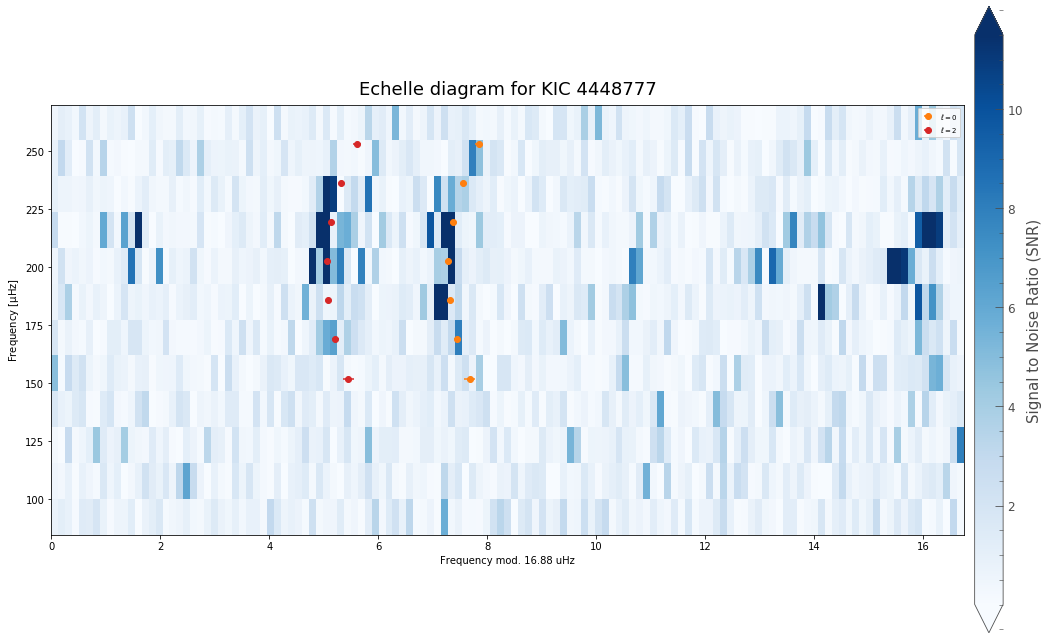

In [14]:
%%time
star.run_asy_peakbag(norders=7, make_plots=True)

In [15]:
%%time
star.run_peakbag(make_plots=True)

Starting peakbagging


2020-07-01, 20:16:38 - pymc3   : Auto-assigning NUTS sampler...
2020-07-01, 20:16:38 - pymc3   : Initializing NUTS using adapt_diag...
2020-07-01, 20:16:42 - pymc3   : Sequential sampling (2 chains in 1 job)
2020-07-01, 20:16:42 - pymc3   : NUTS: [back, height2, height0, l2, l0, width2, width0]
2020-07-01, 20:17:32 - pymc3   : The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
2020-07-01, 20:17:32 - pymc3   : The estimated number of effective samples is smaller than 200 for some parameters.
2020-07-01, 20:17:33 - pymc3   : Auto-assigning NUTS sampler...
2020-07-01, 20:17:33 - pymc3   : Initializing NUTS using adapt_diag...
2020-07-01, 20:17:35 - pymc3   : Sequential sampling (2 chains in 1 job)
2020-07-01, 20:17:35 - pymc3   : NUTS: [back, height2, height0, l2, l0, width2, width0]
2020-07-01, 20:19:02 - pymc3   : The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
2020-07-01

ValueError: need at least one array to stack

Starting prior estimation
Steps taken: 2000
Chains reached stationary state after 2000 iterations.


2020-07-01, 20:19:47 - matplotlib.legend: No handles with labels found to put in legend.
2020-07-01, 20:19:47 - matplotlib.legend: No handles with labels found to put in legend.
2020-07-01, 20:19:47 - CPNest  : Running with 1 parallel threads


Starting asymptotic peakbagging


2020-07-01, 20:20:51 - CPNest  : Sampler process 8424: MCMC samples accumulated = 0
2020-07-01, 20:20:51 - CPNest  : Sampler process 8424 - mean acceptance 0.169: exiting
2020-07-01, 20:20:51 - CPNest  : Final evidence: -1739.41
2020-07-01, 20:20:51 - CPNest  : Information: 18.27
2020-07-01, 20:20:52 - CPNest  : Computed log_evidences: (-1739.5115215371409,)
2020-07-01, 20:20:52 - CPNest  : Relative weights of input files: [1.0]
2020-07-01, 20:20:52 - CPNest  : Relative weights of input files taking into account their length: [1.0]
2020-07-01, 20:20:52 - CPNest  : Number of input samples: [2788]
2020-07-01, 20:20:52 - CPNest  : Expected number of samples from each input file [616]
2020-07-01, 20:20:52 - CPNest  : Samples produced: 616
2020-07-01, 20:20:53 - CPNest  : Computed log_evidences: (-1739.5115215371409,)
2020-07-01, 20:20:53 - CPNest  : Relative weights of input files: [1.0]
2020-07-01, 20:20:53 - CPNest  : Relative weights of input files taking into account their length: [1.0

Starting peakbagging


2020-07-01, 20:21:00 - pymc3   : Auto-assigning NUTS sampler...
2020-07-01, 20:21:00 - pymc3   : Initializing NUTS using adapt_diag...
2020-07-01, 20:21:02 - pymc3   : Sequential sampling (2 chains in 1 job)
2020-07-01, 20:21:02 - pymc3   : NUTS: [back, height2, height0, l2, l0, width2, width0]
2020-07-01, 20:21:48 - pymc3   : The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 1min 9s, sys: 1.34 s, total: 1min 11s
Wall time: 2min 10s


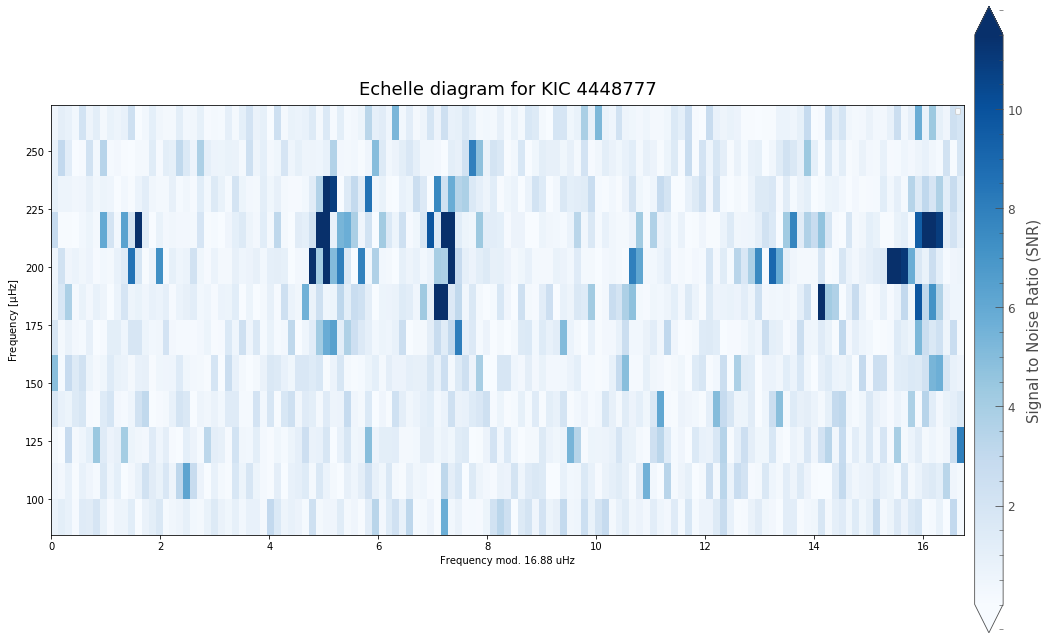

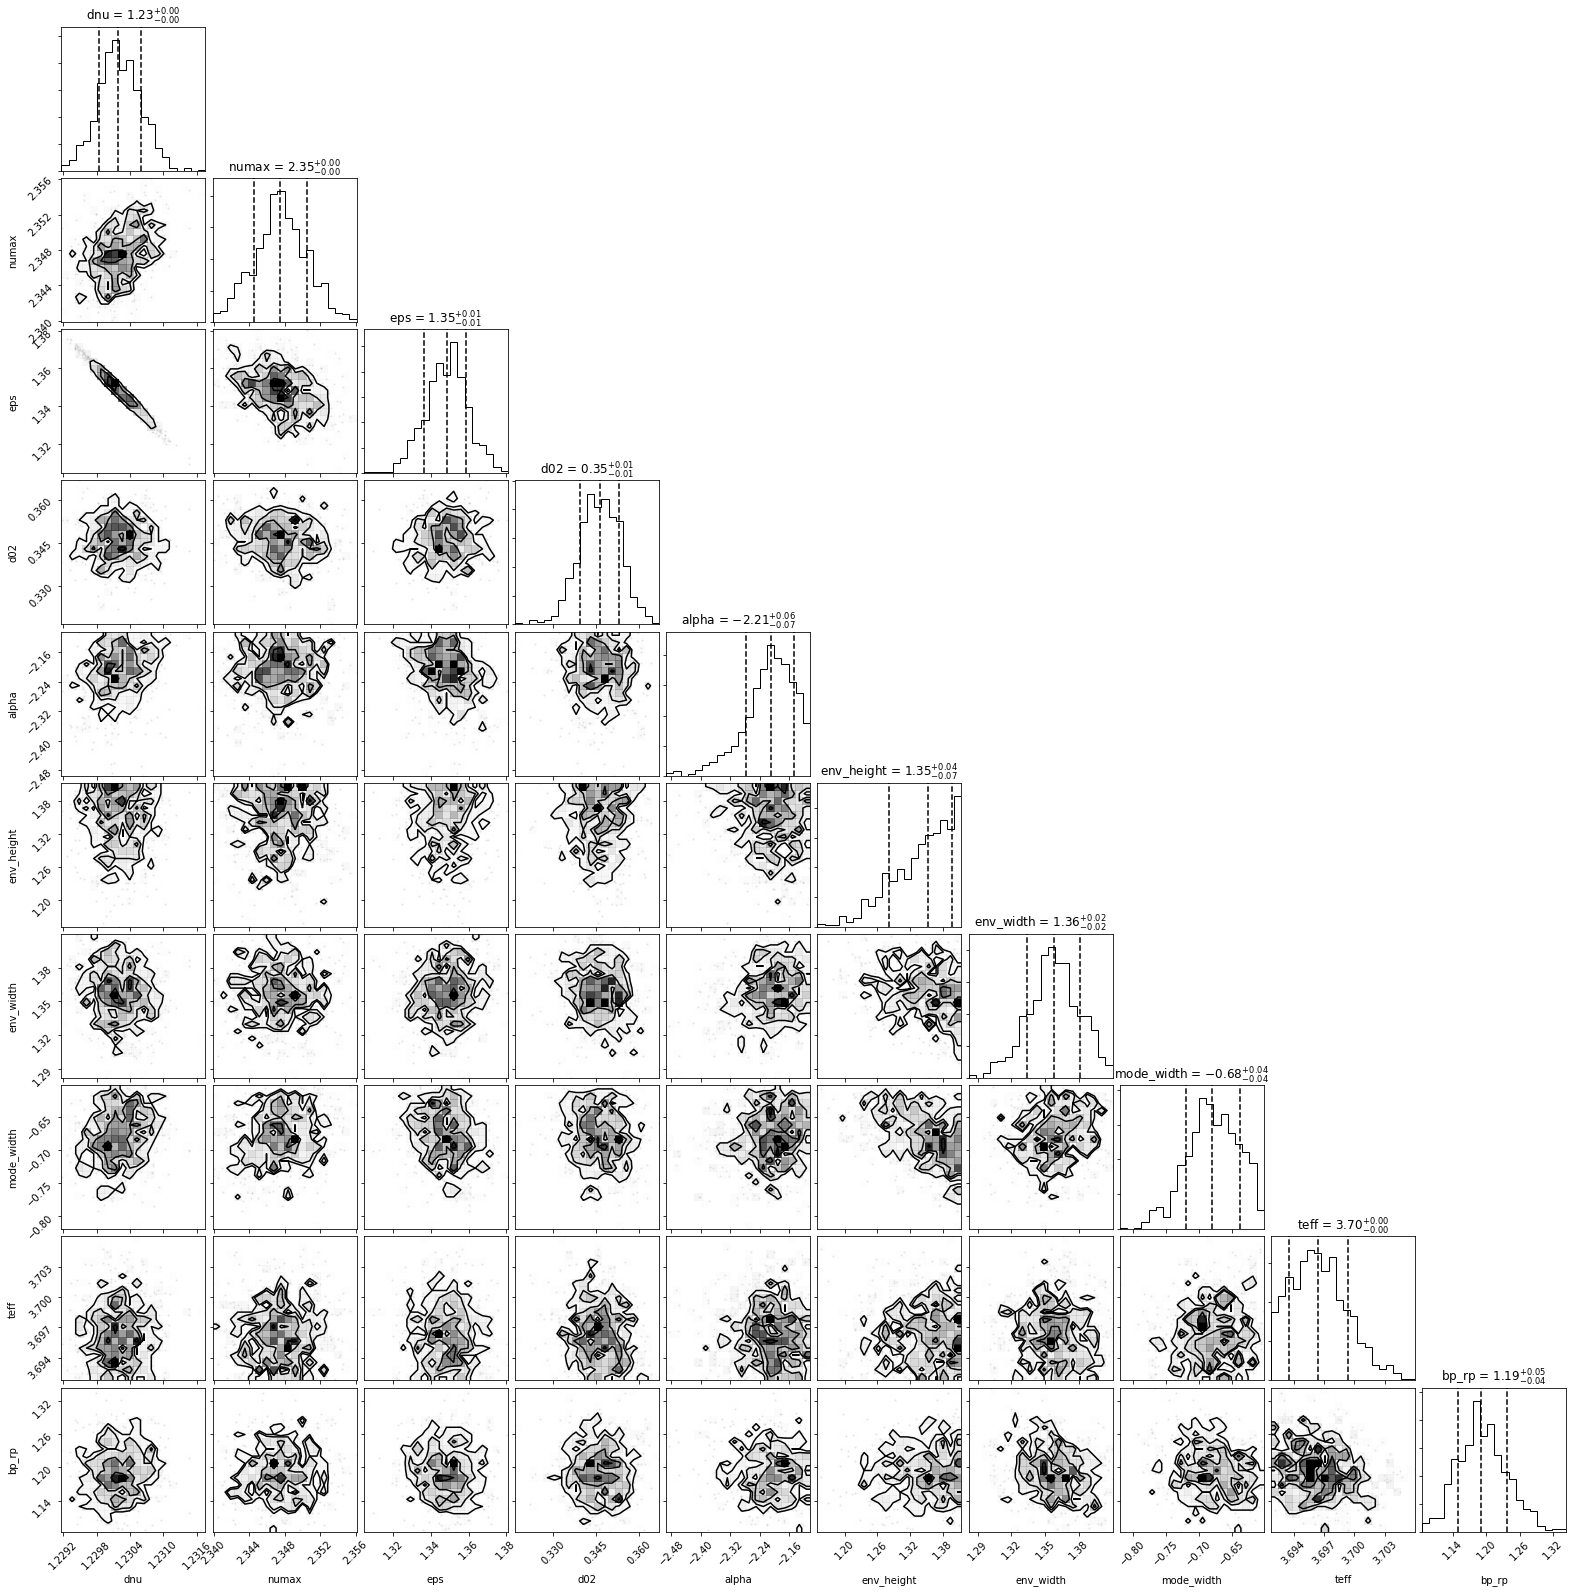

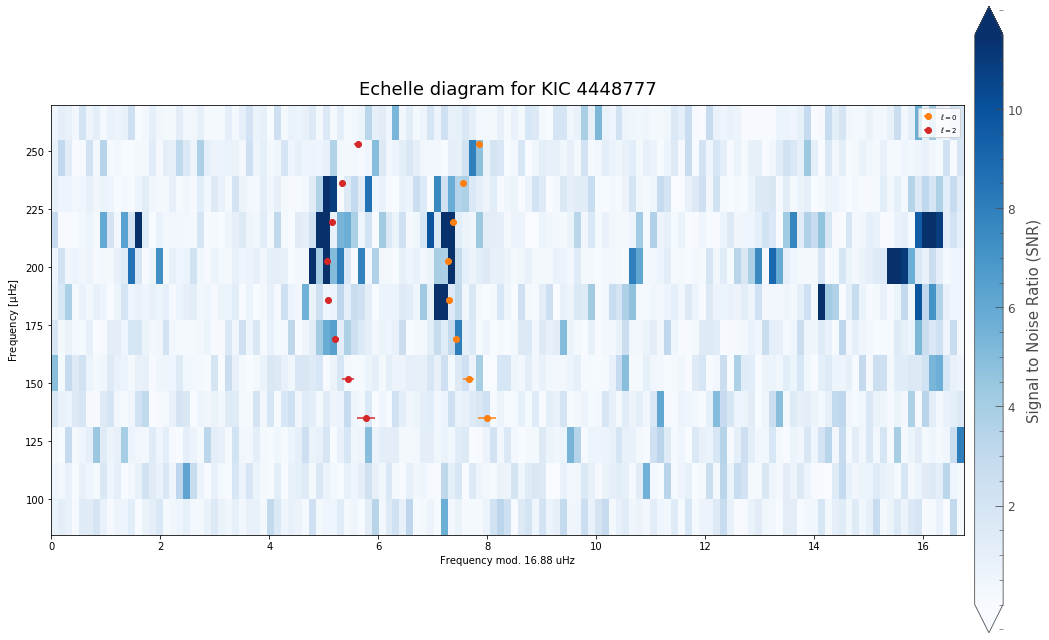

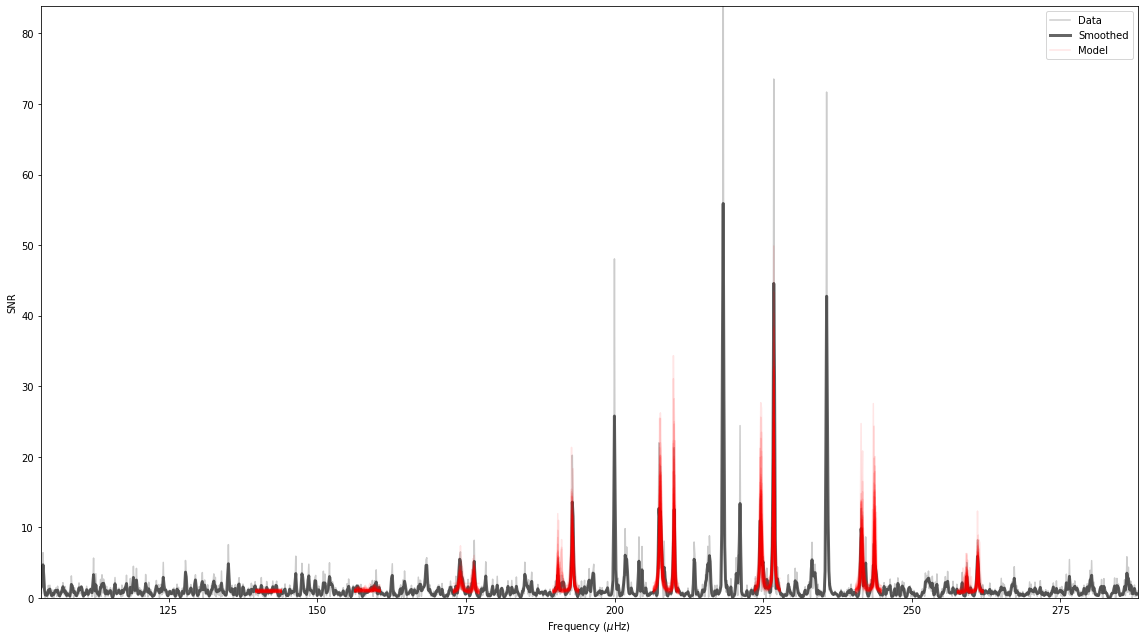

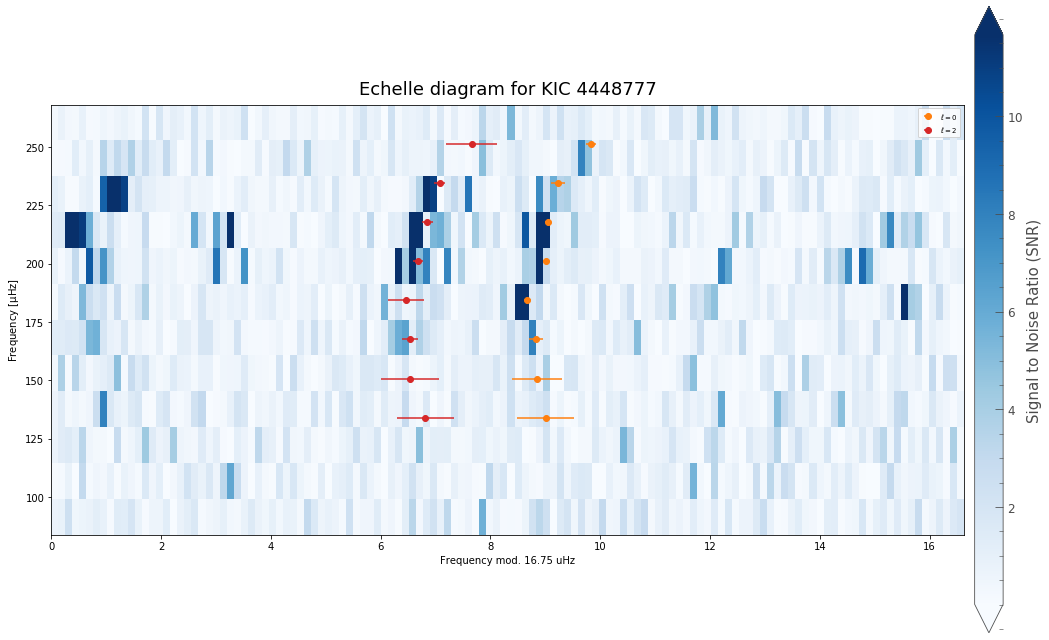

In [18]:
%%time
star(norders=8, asy_sampling='nested')

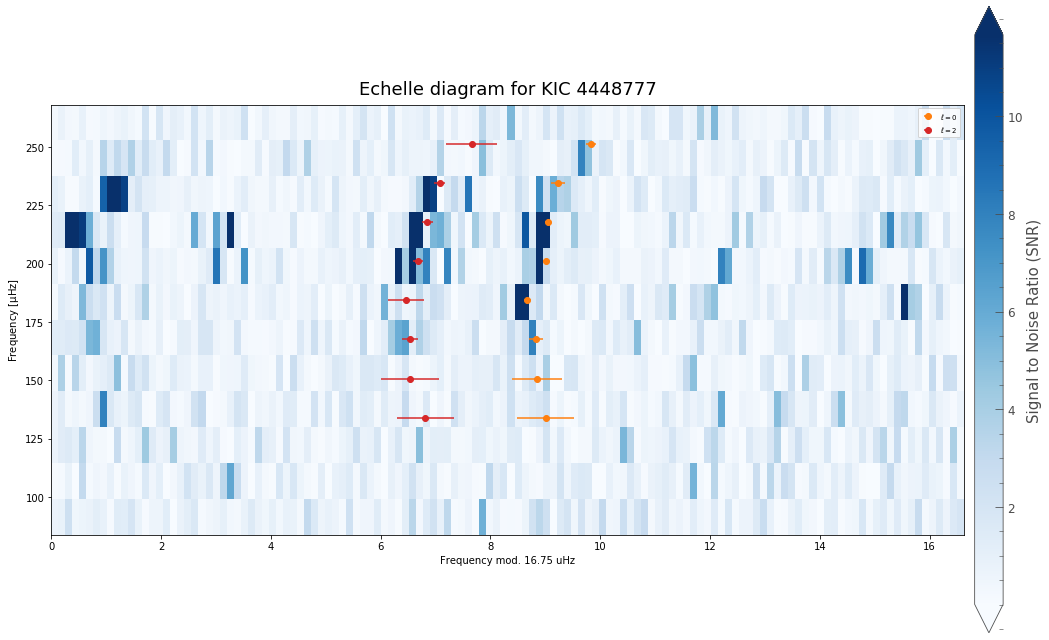

In [19]:
star.peakbag.plot_echelle().savefig('echelle_example.png')